# Imports

In [1]:
import os
import sys
sys.path.append(os.path.sep.join(os.getcwd().split(sep=os.path.sep)[:-1]))

import PlotTools
import StatsTools

import seaborn as sns
import matplotlib.pyplot as plt
import random
import numpy as np
import pandas as pd

random.seed(1)

In [2]:
import importlib
importlib.reload(StatsTools)
importlib.reload(PlotTools)

<module 'PlotTools' from 'D:\\Liel\\Dropbox\\PyCharm\\PycharmProjectsNew\\LielTools_4\\LielTools\\PlotTools.py'>

# Load data

### Iris df

In [3]:
iris_df = sns.load_dataset('iris')
# change some missing values
to_none = random.sample(range(0,150), 50)
iris_df.loc[to_none, 'sepal_width'] = None
iris_df.loc[to_none, 'petal_width'] = None

# show df
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,NaN,1.4,NaN,setosa
1,4.9,NaN,1.4,NaN,setosa
2,4.7,NaN,1.3,NaN,setosa
3,4.6,NaN,1.5,NaN,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,NaN,5.2,NaN,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### Diamonds df

In [4]:
diam_df = sns.load_dataset('diamonds')
diam_df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


### Penguins df

In [5]:
peng_df = sns.load_dataset('penguins')
peng_df.drop(index=[3,339], inplace=True)
peng_df['bill_length-depth ratio'] = peng_df['bill_length_mm'] / peng_df['bill_depth_mm']
peng_df['flipper_length body_mass ratio'] = peng_df['flipper_length_mm'] / peng_df['body_mass_g']
peng_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,bill_length-depth ratio,flipper_length body_mass ratio
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE,2.090909,0.048267
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,2.270115,0.048947
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,2.238889,0.060000
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,1.901554,0.055942
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE,1.907767,0.052055
...,...,...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE,3.445255,0.043452
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE,3.272727,0.044330
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE,3.210191,0.038609
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE,3.054054,0.040769


### Exercise df

In [6]:
exercise_df = sns.load_dataset('exercise').drop(columns='Unnamed: 0')

# show df
exercise_df

,id,diet,pulse,time,kind
0,1,low fat,85,1 min,rest
1,1,low fat,85,15 min,rest
2,1,low fat,88,30 min,rest
3,2,low fat,90,1 min,rest
4,2,low fat,92,15 min,rest
...,...,...,...,...,...
85,29,no fat,135,15 min,running
86,29,no fat,130,30 min,running
87,30,no fat,99,1 min,running
88,30,no fat,111,15 min,running


Change to a wider format, with each person in a its own row with the pulse of each different time in a different column

In [25]:
exercise_df_wide = exercise_df.set_index(['id', 'diet', 'kind', 'time'])['pulse'].unstack()

# Wilcoxon rank-sum / Mann Whitney U

The Mann-Whitney U test is a nonparametric statistical significance test for determining whether two <b>independent</b> samples<br>
were drawn from a population with the same distribution. (read more in function documentation below)

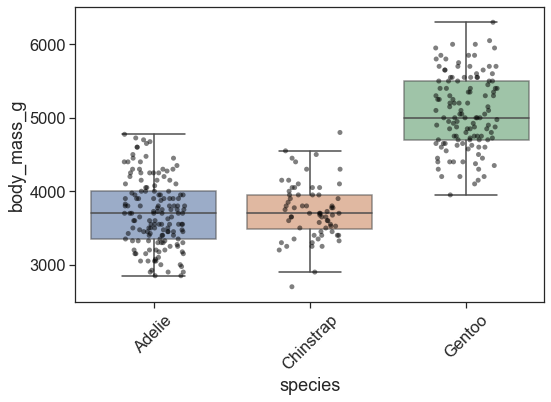

In [8]:
PlotTools.plot_boxplot(peng_df["species"], # x values series
                       peng_df["body_mass_g"], # y values series
                       figsize=(8, 6), font_scale=1.5, jitter=0.2,
                       stripplot_size=5, stripplot_alpha=0.5)

Lets test whether the Chinstrap body mass is signifigantly different than the Gentoo.

In [9]:
help(StatsTools.perform_mann_whitney_u_wilcoxon_rank_sum)

Help on function perform_mann_whitney_u_wilcoxon_rank_sum in module StatsTools:

perform_mann_whitney_u_wilcoxon_rank_sum(series1, series2, alternative='two-sided', print_res=True, alpha=0.05)
    The Mann-Whitney U test is a nonparametric statistical significance test for determining whether two independent samples
    were drawn from a population with the same distribution.
    
    The test was named for Henry Mann and Donald Whitney, although it is sometimes called the Wilcoxon-Mann-Whitney test,
    also named for Frank Wilcoxon, who also developed a variation of the test.
    
    The two samples are combined and rank ordered together. The strategy is to determine if the values from the two samples are
    randomly mixed in the rank ordering or if they are clustered at opposite ends when combined.
    A random rank order would mean that the two samples are not different,
    while a cluster of one sample values would indicate a difference between them.
    
    The default assump

In [10]:
StatsTools.perform_mann_whitney_u_wilcoxon_rank_sum(peng_df.loc[peng_df['species']=='Gentoo', "body_mass_g"], 
                                                    peng_df.loc[peng_df['species']=='Chinstrap', "body_mass_g"], 
                                                    alternative='two-sided', print_res=True, alpha=0.05)

Mann-whitney U / Wilcoxon rank-sum test (alternative: two-sided): 
Statistic=8233.0, p-value=1.6723632138556386e-28.
Data drawn from different distributions (can reject H0)


# Wilcoxon signed-rank

The Wilcoxon signed-rank test is a nonparametric statistical significance test for determining whether two <b>dependent (paired)</b> samples<br>
were drawn from a population with the same distribution. (read more in function documentation below)

First, lets look at the low fat individuals in exercise_df, and compare their 1 min and 15 min heart rate.

D:\Liel\anaconda3\envs\tcr2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

walking_1 min v.s. walking_15 min: Mann-Whitney-Wilcoxon test two-sided, P_val=2.477e-01 U_stat=6.500e+00
rest_1 min v.s. rest_15 min: Mann-Whitney-Wilcoxon test two-sided, P_val=6.733e-01 U_stat=1.000e+01
running_1 min v.s. running_15 min: Mann-Whitney-Wilcoxon test two-sided, P_val=2.001e-02 U_stat=1.000e+00


D:\Liel\anaconda3\envs\tcr2\lib\site-packages\seaborn\categorical.py:2775: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


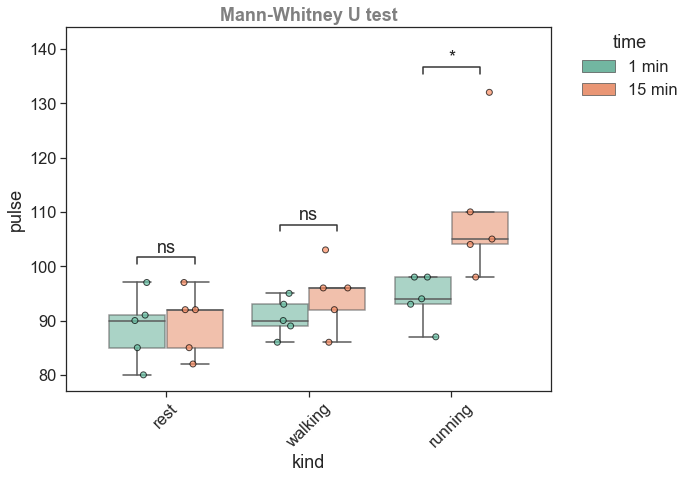

In [11]:
# statannot must be installed prior to using this function: ** pip install git+https://github.com/webermarcolivier/statannot.git
exercise_df_low_fat = exercise_df.loc[exercise_df['diet']=='low fat']
exercise_df_low_fat['time'] = exercise_df_low_fat["time"].astype("object") # was type Category, then, added '30 min' to the legend as well (stored as one of the categories)

PlotTools.plot_boxplot_hue_stats_text(exercise_df_low_fat.loc[exercise_df_low_fat['time'].isin(['1 min', '15 min'])], 
                                      x_col_name='kind', y_col_name='pulse', hue_col_name='time',
                                      test='Mann-Whitney', comparisons_correction=None,
                                      stats_loc='inside', stats_line_offset=None, stats_line_height=0.02,
                                      stats_text_offset=1, stats_linewidth=1.5,
                                      stats_fontsize='medium', stats_width=0.8,
                                      # boxplot_kwargs
                                      figsize=(10,7), font_scale=1.5, palette='Set2', stripplot_size=6, linewidth=1,
                                      plotTitle='Mann-Whitney U test', titleColor='grey', jitter=0.2)

In [12]:
help(StatsTools.perform_wilcoxon_signed_rank)

Help on function perform_wilcoxon_signed_rank in module StatsTools:

perform_wilcoxon_signed_rank(series1, series2, alternative='two-sided', print_res=True, alpha=0.05)
    A nonparametric statistical significance test for determining whether two dependent samples (paired)
    were drawn from a population with the same distribution.
    For the test to be effective, it requires at least 20 observations in each data sample.
    
    Fail to Reject H0: Sample distributions are equal.
    Reject H0: Sample distributions are not equal.
    
    Info from: https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
    
    @param: series1: data series 1. Can be pd.Series or N-d arrays of samples
    @param: series2: data series 2. Can be pd.Series or N-d arrays of samples
    @param: alternative: ‘two-sided’, ‘less’, ‘greater’. Default 'two-sided'
    @param: print_res: boolean. Whether to print the test statistic, pvalue and conclusion. Default True
    @ret

Let's check if the pulse of the runners is signifigantly lower after 1 minute compared to 15 minutes. 

In [13]:
exercise_df_low_fat_running = exercise_df_low_fat.loc[exercise_df_low_fat['kind']=='running']
StatsTools.perform_wilcoxon_signed_rank(exercise_df_low_fat_running.loc[exercise_df_low_fat_running['time']=='1 min', 'pulse'], 
                                        exercise_df_low_fat_running.loc[exercise_df_low_fat_running['time']=='15 min', 'pulse'], 
                                        alternative='less', print_res=True, alpha=0.05)

Wilcoxon signed-rank test (alternative: less): 
Statistic=0.0, p-value=0.021557223391537678.
Data drawn from different distributions (can reject H0)


D:\Liel\anaconda3\envs\tcr2\lib\site-packages\scipy\stats\morestats.py:2863: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


# Shapiro Wilk (Test of Normality)
The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution.


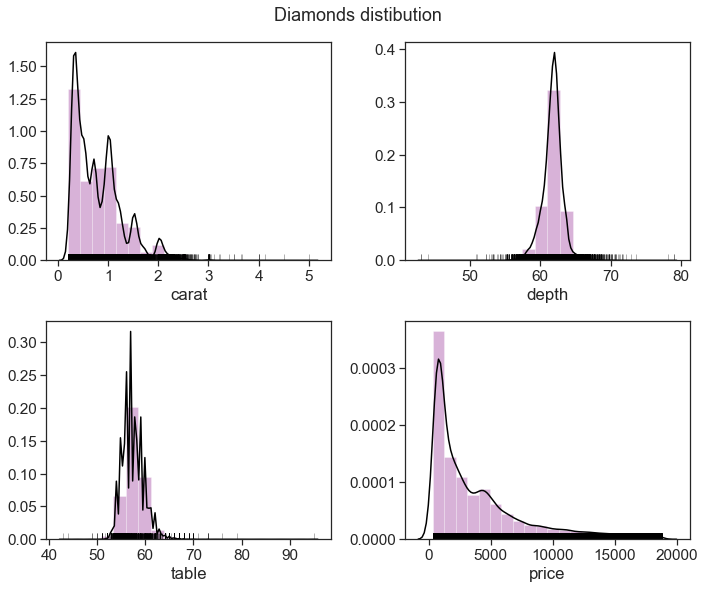

In [14]:
fig = PlotTools.plot_columns_dist(diam_df[['carat', 'depth', 'table', 'price']], 
                            output_file_path=None, fig_rows=2, fig_cols=2, figsize=(10, 8), bins=20, 
                            kde_color='black', hist_color='purple', hist_alpha=0.3,
                            title='Diamonds distibution', title_fontsize=18, title_y=1.03,
                            rug=True, rug_color='black', rug_alpha=0.3,
                            rug_linewidth=1, rug_height=0.03, font_scale=1.4)

In [15]:
help(StatsTools.perform_shapiro_wilk)

Help on function perform_shapiro_wilk in module StatsTools:

perform_shapiro_wilk(data_series, print_res=True, alpha=0.05)
    The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution.
    
    If the p-value obtained from the Shapiro-Wilk test is significant (p < 0.05),
    we conclude that the data is not normally distributed.
    
    @param: data_series: data series to test. Can be pd.Series or N-d arrays of samples
    @param: print_res: boolean. Whether to print the test statistic, pvalue and conclusion. Default True
    @return: alpha: Alpha to determine whether p-value is significant or not. default 0.05
    return: stat, pval



In [16]:
StatsTools.perform_shapiro_wilk(diam_df['price'], print_res=True, alpha=0.05)

Shapiro-Wilk test - Statistic=0.7981084585189819, p-value=0.0.
Data is not normally distributed (rejected H0)


D:\Liel\anaconda3\envs\tcr2\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


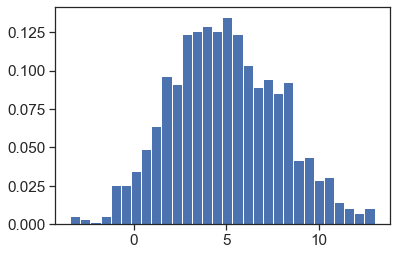

In [17]:
normal_data = np.random.normal(5, 3, 1000)

plt.hist(normal_data, 30, density=True)
plt.show()

In [18]:
StatsTools.perform_shapiro_wilk(normal_data, print_res=True, alpha=0.05)

Shapiro-Wilk test - Statistic=0.996492326259613, p-value=0.024631500244140625.
Data is not normally distributed (rejected H0)


# Chi-square test of independence
Perform a Chi-square test of independence over a table of observed values between two categories, or a dataframe with 2 categorical variables.

In [19]:
help(StatsTools.chi_square_test_independence)

Help on function chi_square_test_independence in module StatsTools:

chi_square_test_independence(df=None, var1_name=None, var2_name=None, table_observed=None, alpha=0.05, print_res=True, plot_fig=True, figsize=(12, 5), annotate_fontsize=8, font_scale=1, fix_smaller_rows_at_y_edges_bug=True)
    Perform a Chi-square test of independence over a table of observed values between
    two categories.
    Function can either get the table of observed values itself (as a pd.Dataframe),
    for example:
                   Yes  No
            Red     50  20
            Blue    20  90
            Green   30  90
    
    ( table_observed = pd.DataFrame({'Yes': {'Red': 50, 'Blue': 20, 'Green': 30}, 'No': {'Red': 20, 'Blue': 90, 'Green': 90}})  )
    or, can get a pd.Dataframe and 2 variables (columns) names and create such table.
    
    @param df: pd.Dataframe.
    @param var1_name: str, the name of a column in df with categorical data.
                        If table_observed is given, string 

Chi-square score is 296.487, p-value is 0.0000000, degrees of freedom: 4
Null Hypothesis - variables are independent. It is rejected with alpha=0.05.
Could not perform line: 
ax.collections[0].colorbar.tick_params(axis=u'both', which=u'both', length=0) 
in LielTools_v3\PlotTools.py
Could not perform line: 
ax.collections[0].colorbar.tick_params(axis=u'both', which=u'both', length=0) 
in LielTools_v3\PlotTools.py
Could not perform line: 
ax.collections[0].colorbar.tick_params(axis=u'both', which=u'both', length=0) 
in LielTools_v3\PlotTools.py


(296.48717774875377, 0.0, <Figure size 1440x576 with 6 Axes>)

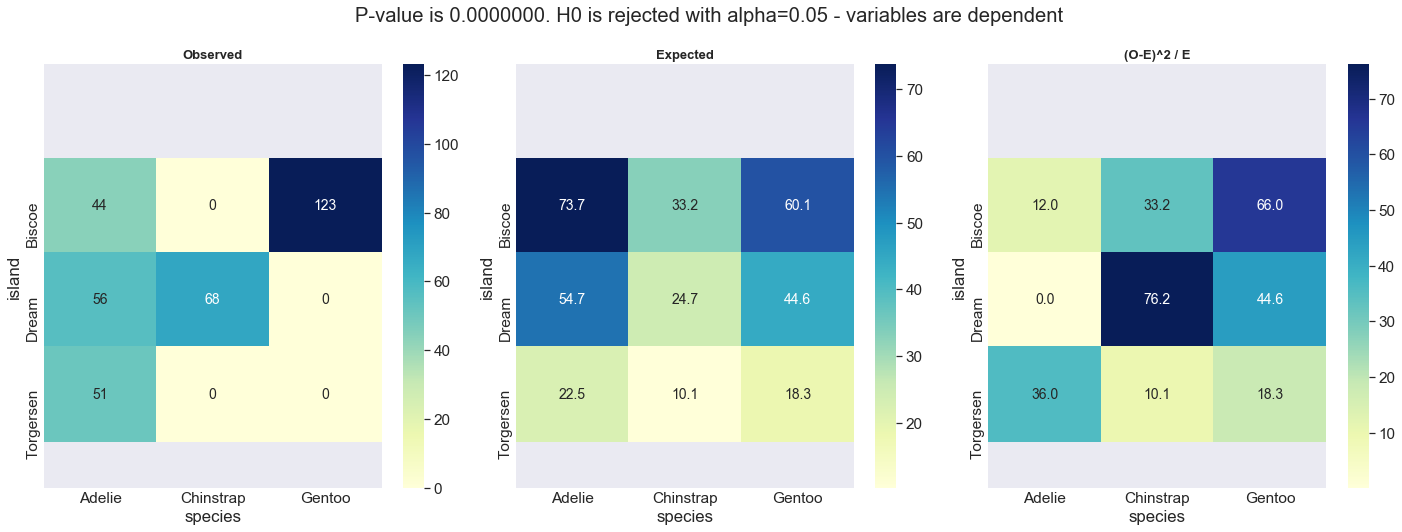

In [20]:
StatsTools.chi_square_test_independence(df=peng_df, var1_name='island', var2_name='species', table_observed=None, alpha=0.05,
                                        print_res=True, plot_fig=True, figsize=(20, 8), annotate_fontsize=14, font_scale=1.4)

In [26]:
table_observed = pd.DataFrame({'Yes': {'Red': 500, 'Blue': 250, 'Green': 250}, 
                               'No': {'Red': 200, 'Blue': 900, 'Green': 900}})
print(table_observed)

       Yes   No
Red    500  200
Blue   250  900
Green  250  900


Chi-square score is 596.273, p-value is 0.0000000, degrees of freedom: 2
Null Hypothesis - variables are independent. It is rejected with alpha=0.05.
Could not perform line: 
ax.collections[0].colorbar.tick_params(axis=u'both', which=u'both', length=0) 
in LielTools_v3\PlotTools.py
Could not perform line: 
ax.collections[0].colorbar.tick_params(axis=u'both', which=u'both', length=0) 
in LielTools_v3\PlotTools.py
Could not perform line: 
ax.collections[0].colorbar.tick_params(axis=u'both', which=u'both', length=0) 
in LielTools_v3\PlotTools.py


(596.2732919254659, 0.0, <Figure size 1440x576 with 6 Axes>)

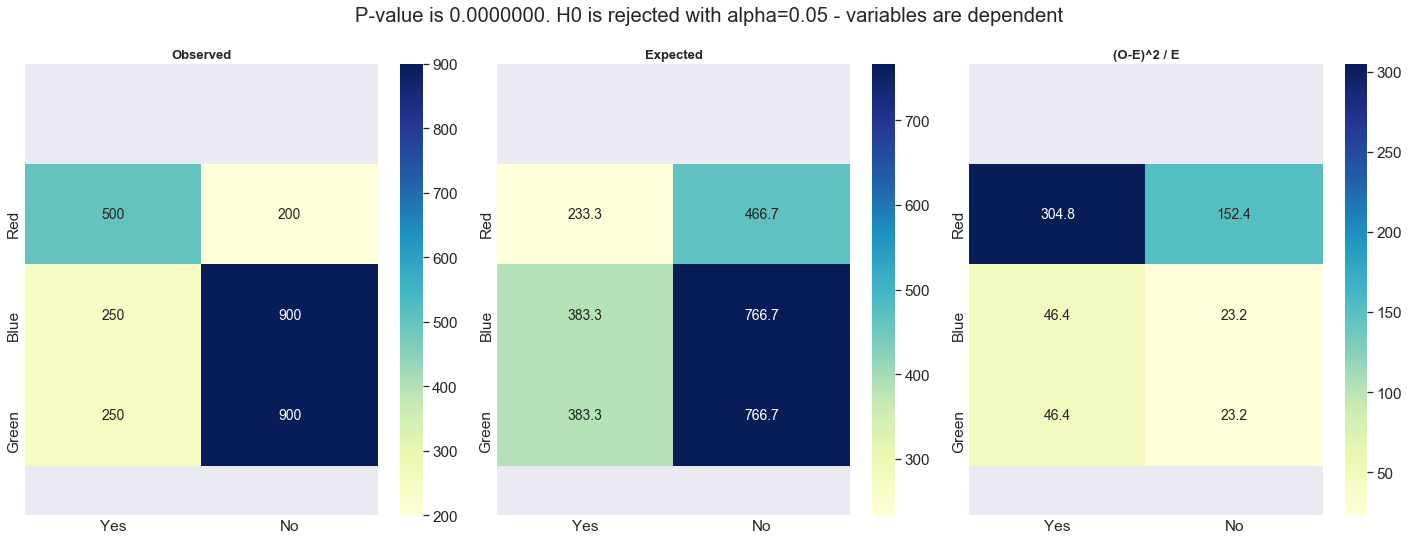

In [27]:
StatsTools.chi_square_test_independence(table_observed=table_observed, alpha=0.05,
                                        print_res=True, plot_fig=True, figsize=(20, 8), annotate_fontsize=14, font_scale=1.4)

In [23]:
data_observed = pd.DataFrame({'col1': pd.Series(random.choices(['A', 'A', 'B', 'B', 'C', 'D', 'E'], k=1000)), 
                              'col2': pd.Series(random.choices(['Red','Green','Blue'], k=1000))} )
print(data_observed)

    col1   col2
0      B   Blue
1      E    Red
2      E    Red
3      A    Red
4      C  Green
..   ...    ...
995    A    Red
996    E   Blue
997    C   Blue
998    A   Blue
999    C  Green

[1000 rows x 2 columns]


Chi-square score is 9.544, p-value is 0.2985285, degrees of freedom: 8
Null Hypothesis - variables are independent. Failed to reject it with alpha=0.05.
Could not perform line: 
ax.collections[0].colorbar.tick_params(axis=u'both', which=u'both', length=0) 
in LielTools_v3\PlotTools.py
Could not perform line: 
ax.collections[0].colorbar.tick_params(axis=u'both', which=u'both', length=0) 
in LielTools_v3\PlotTools.py
Could not perform line: 
ax.collections[0].colorbar.tick_params(axis=u'both', which=u'both', length=0) 
in LielTools_v3\PlotTools.py


(9.54362182835632, 0.2985285446109909, <Figure size 1440x576 with 6 Axes>)

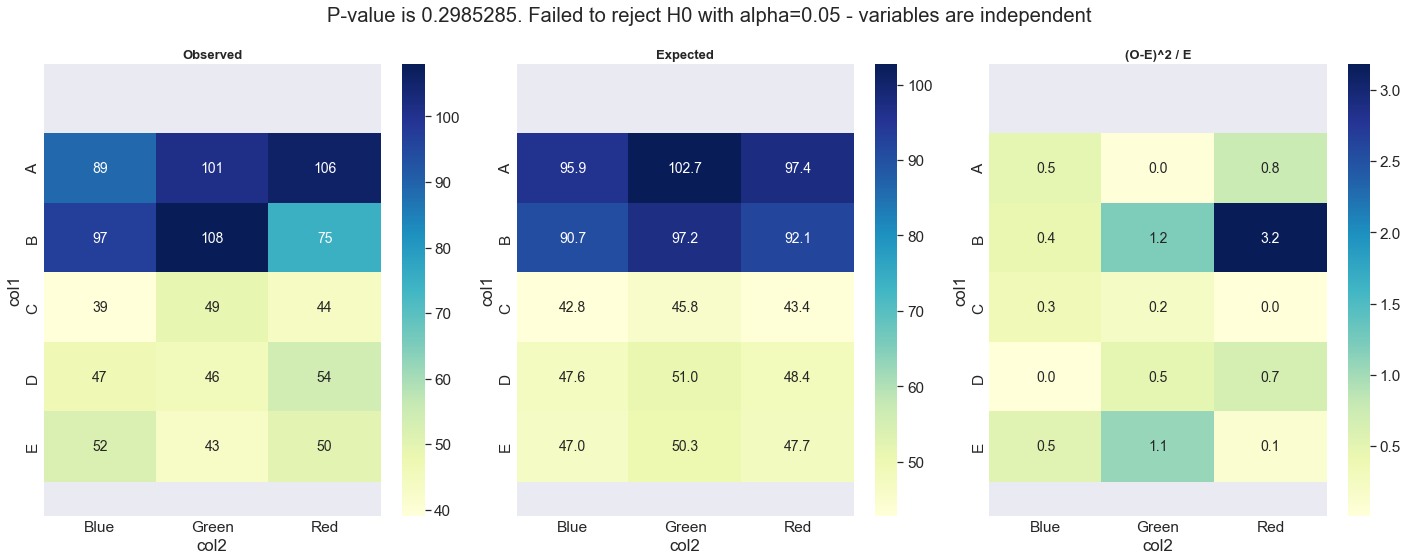

In [24]:
StatsTools.chi_square_test_independence(df=data_observed, var1_name='col1', var2_name='col2', alpha=0.05, 
                                        print_res=True, plot_fig=True, figsize=(20, 8), annotate_fontsize=14, font_scale=1.4)